In [1]:
%matplotlib widget
import saqc
import warnings
warnings.filterwarnings('ignore')
saqc.lib.plotting.FIG_KWARGS["figsize"] = (10, 4)

# 0. About this Document

* You will find a copy of this document at https://git.ufz.de/rdm/saqccourse, for a quick setup open https://git.ufz.de/rdm/saqccourse and search and click the following batch: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgit.ufz.de%2Frdm%2Fsaqccourse/HEAD?labpath=saqccourse.ipynb)
* This Jupyter Notebook is intended to lead through the necessary steps of quality control with SaQC
* We will include data from the course repository ([here](https://git.ufz.de/rdm/saqccourse/-/blob/2023/data))
* Along the lines of the quality control setup, we will cover the most important aspect and functionalities of [SaQC](https://git.ufz.de/rdm-software/saqc) and its Python API
* Throughout the script, the [SaQC (API) Documentation](https://rdm-software.pages.ufz.de/saqc/index.html) is referenced for more details 

# 1. The quality control workflow
## 1.1 Data import and preparation

* `saqc` does not provide data input/output functionality
* Data import is done using the [pandas](https://pandas.pydata.org/) package
* The `SaQC` class provided with the package, accepts (one or more) [`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) objects as inputs, from which it will generate an `SaQC` instance that provides all oprerations to modify and quality control the data. 

To load the data (a csv file), we use the pandas [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) method and provide it:
* the path to the data
* the index of the timestamp column (`index_col=0`)
* a list of column numbers that we want to convert to a 'datetime' data type (`parse_dates=[0]`)

In [2]:
import pandas as pd

data = pd.read_csv('data/SAK254.csv', index_col=0, parse_dates=[0])
# lets see how the first entries and the heading of the data look like:
data.head()

logger-voltage   SAK254
timestamp                                   
2021-01-01 00:02:00          13.018  15.6118
2021-01-01 00:17:00          13.018  15.5485
2021-01-01 00:32:00          13.021  15.6805
2021-01-01 00:47:00          13.021  15.6337
2021-01-01 01:02:00          13.029  15.6145

Apparently, the dataset contains two variables `'SAK254'` and `'logger-voltage'`

## 1.2 Initializing SaQC

To get started with quality control, we:
1. import the package `saqc`
2. instantiate a [SaQC](https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC) object with a prepared data set
3. assign the generated `SaQC` object to a variable (here called `qc`) for later usage

In [3]:
import saqc

In [4]:
qc = saqc.SaQC(data)

The initialized object holds two data structures:
   1. the `data` itself
   2. the quality `flags` for every observation

In [5]:
qc.data

             logger-voltage |                       SAK254 | 
=========================== | ============================ | 
2021-01-01 00:02:00  13.018 | 2021-01-01 00:02:00  15.6118 | 
2021-01-01 00:17:00  13.018 | 2021-01-01 00:17:00  15.5485 | 
2021-01-01 00:32:00  13.021 | 2021-01-01 00:32:00  15.6805 | 
2021-01-01 00:47:00  13.021 | 2021-01-01 00:47:00  15.6337 | 
2021-01-01 01:02:00  13.029 | 2021-01-01 01:02:00  15.6145 | 
...                     ... | ...                      ... | 
2021-11-30 22:47:00  12.997 | 2021-11-30 22:47:00  37.2364 | 
2021-11-30 23:02:00  13.001 | 2021-11-30 23:02:00  37.4454 | 
2021-11-30 23:17:00  12.993 | 2021-11-30 23:17:00  37.4055 | 
2021-11-30 23:32:00  12.993 | 2021-11-30 23:32:00  37.2047 | 
2021-11-30 23:47:00  12.991 | 2021-11-30 23:47:00  37.4412 | 

In [6]:
qc.flags

          logger-voltage |                   SAK254 | 
======================== | ======================== | 
2021-01-01 00:02:00 -inf | 2021-01-01 00:02:00 -inf | 
2021-01-01 00:17:00 -inf | 2021-01-01 00:17:00 -inf | 
2021-01-01 00:32:00 -inf | 2021-01-01 00:32:00 -inf | 
2021-01-01 00:47:00 -inf | 2021-01-01 00:47:00 -inf | 
2021-01-01 01:02:00 -inf | 2021-01-01 01:02:00 -inf | 
...                  ... | ...                  ... | 
2021-11-30 22:47:00 -inf | 2021-11-30 22:47:00 -inf | 
2021-11-30 23:02:00 -inf | 2021-11-30 23:02:00 -inf | 
2021-11-30 23:17:00 -inf | 2021-11-30 23:17:00 -inf | 
2021-11-30 23:32:00 -inf | 2021-11-30 23:32:00 -inf | 
2021-11-30 23:47:00 -inf | 2021-11-30 23:47:00 -inf | 

- These internal data structures are of data type `DictOfSeries`.
- The main differnence between `DictOfSeries` and `pandas.DataFrame` is, that all time series have there own index. That implies, that we are able to store time series of different length within a single `DictOfSeries` object. 
- To select certain `pandas.Series` `DictOfSeries` supports the usal slicing operations:.
- To convert these internal data structures into the more familiar `pandas.DataFrame` use the method `to_pandas`.

In [7]:
# select a single timeseries
qc.data["SAK254"]

timestamp
2021-01-01 00:02:00    15.6118
2021-01-01 00:17:00    15.5485
2021-01-01 00:32:00    15.6805
2021-01-01 00:47:00    15.6337
2021-01-01 01:02:00    15.6145
                        ...   
2021-11-30 22:47:00    37.2364
2021-11-30 23:02:00    37.4454
2021-11-30 23:17:00    37.4055
2021-11-30 23:32:00    37.2047
2021-11-30 23:47:00    37.4412
Name: SAK254, Length: 32046, dtype: float64

In [8]:
# select a single observation of a timeseries
qc.data["SAK254"]["2021-01-01 00:02:00"]

15.6118

In [9]:
# convert to pandas.DataFrame
qc.data.to_pandas()

logger-voltage   SAK254
timestamp                                   
2021-01-01 00:02:00          13.018  15.6118
2021-01-01 00:17:00          13.018  15.5485
2021-01-01 00:32:00          13.021  15.6805
2021-01-01 00:47:00          13.021  15.6337
2021-01-01 01:02:00          13.029  15.6145
...                             ...      ...
2021-11-30 22:47:00          12.997  37.2364
2021-11-30 23:02:00          13.001  37.4454
2021-11-30 23:17:00          12.993  37.4055
2021-11-30 23:32:00          12.993  37.2047
2021-11-30 23:47:00          12.991  37.4412

[32046 rows x 2 columns]

## 1.3 Plotting

* The `SaQC` object provides a plotting routine [`plot`](https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC.plot).
* The plots show the data, existing flags and name their origin.

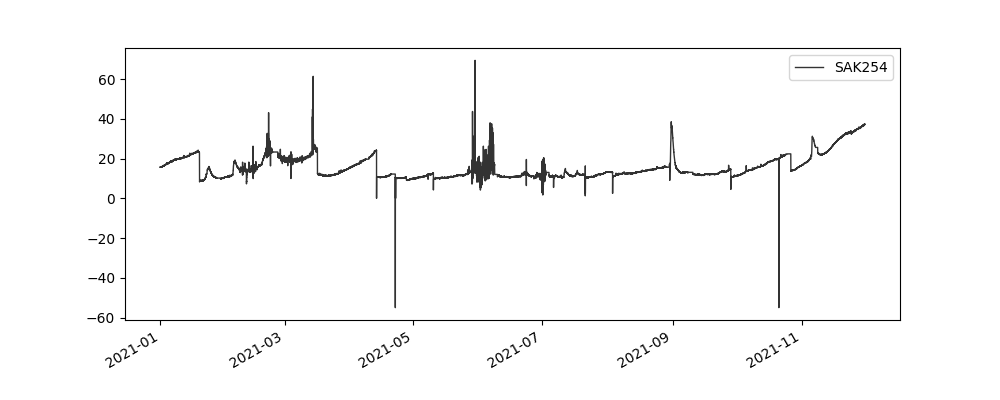

In [10]:
# plot the absorbtion coefficients (SAK254)
qc.plot(field='SAK254')

To generate zoomed plots, adjust the period to plot using the `xscope` and `yscope` parameters of the [`plot`](https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC.plot) method

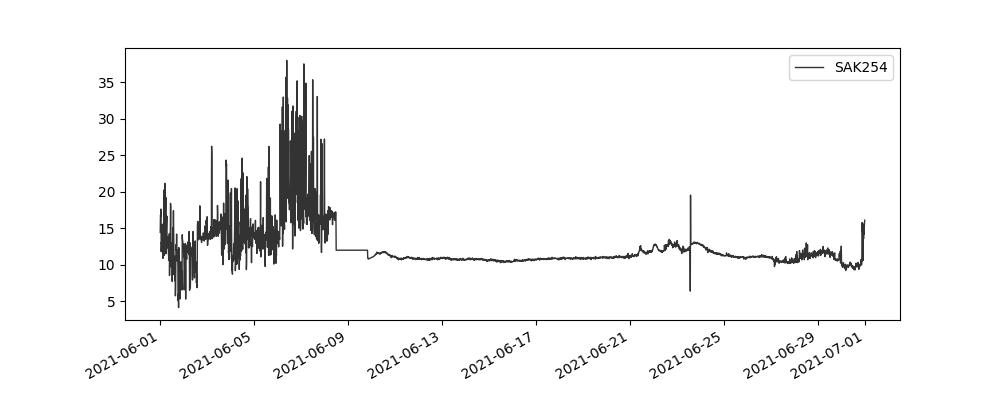

In [11]:
qc.plot(field='SAK254', xscope='2021-06')

Its also posible to pass `slice` objects to better determine the displayed data chunks

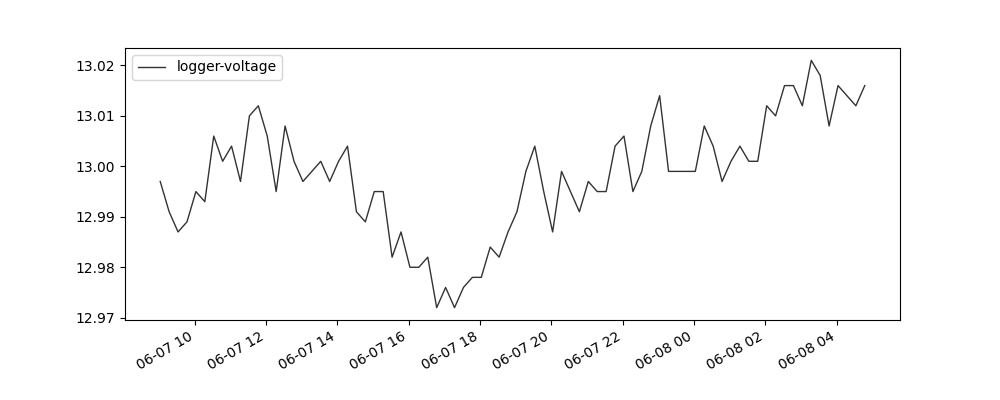

In [12]:
qc.plot(field='logger-voltage', xscope=slice('2021-06-07 09:00:00', '2021-06-08 05:00:00'))

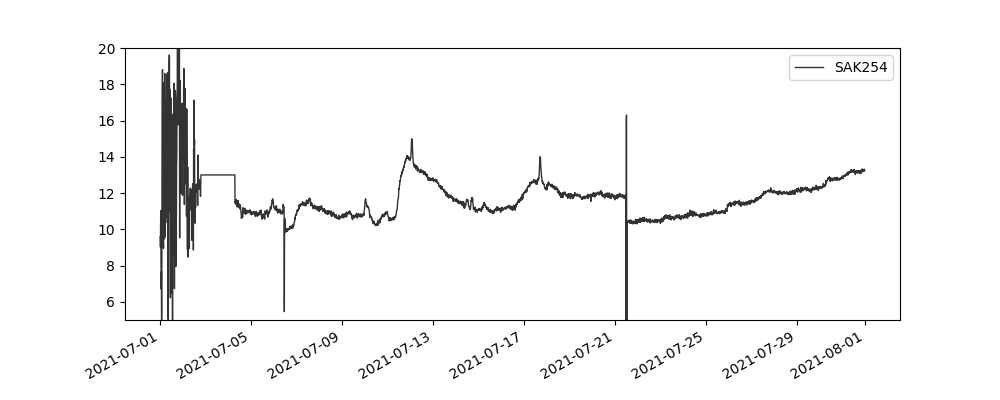

In [13]:
# zoom into in x and y axis
qc.plot(field='SAK254', xscope='2021-07', yscope=(5, 20))

We can generate multiplots of the variables contained in an `SaQC` object:

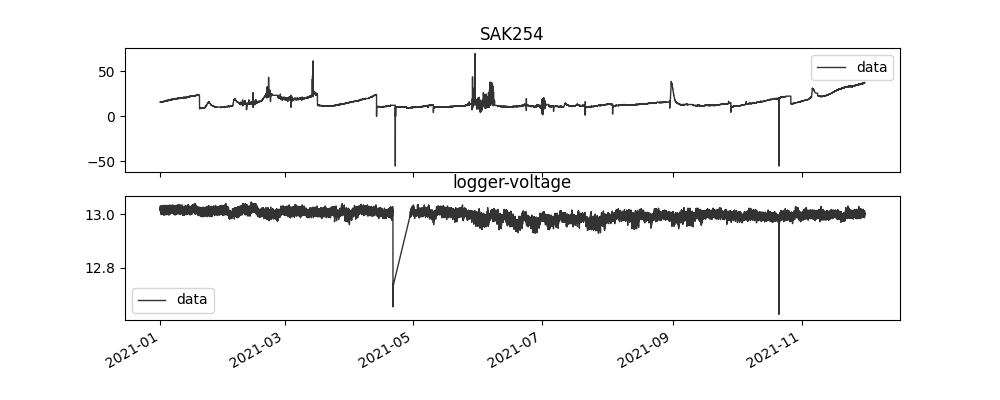

In [14]:
# subplots
qc.plot(field=['SAK254', 'logger-voltage'], mode='subplots')

## 1.4 The Dataset

* The data labeled *SAK254* represents measurements of the spectral absorption coefficient at wavelength 254 nanometers, in this case, in a body of water. (This is correlated with the decay rate of light at this wavelength in the tested material).  
* The variable *logger-voltage* refers to the voltage level of the battery the sensors logger is powered by.

In addition to observational data, we include maintenance data of the *SAK254* sensor. (During maintenance, the sensor is removed from the medium under test, the measurement therefore not meaningful)

We repeat the steps performed while importing the measurement data for the maintenance data import:

In [15]:
maintenance = pd.read_csv('data/SAK254maintenance.csv', index_col=0, parse_dates=[0])

# lets see how the first entries and the heading of the data looks like:
maintenance.head()

maintenance
2020-05-05 12:10:00  2020-05-05 13:25:00
2020-06-08 13:10:00  2020-06-08 14:50:00
2020-06-15 13:05:00  2020-06-15 15:20:00
2020-07-14 11:20:00  2020-07-14 13:00:00
2020-08-05 11:20:00  2020-08-05 12:35:00

So this data contains timestamps denoting intervals when the sensor was actually in maintenance and its values are not valid. We combine that data with the already loaded observational data into a new `SaQC` object.

In [16]:
qc = saqc.SaQC([data, maintenance])

In [17]:
qc.data

             logger-voltage | ... |                              maintenance | 
=========================== | === | ======================================== | 
2021-01-01 00:02:00  13.018 | ... | 2020-05-05 12:10:00  2020-05-05 13:25:00 | 
2021-01-01 00:17:00  13.018 |     | 2020-06-08 13:10:00  2020-06-08 14:50:00 | 
2021-01-01 00:32:00  13.021 |     | 2020-06-15 13:05:00  2020-06-15 15:20:00 | 
2021-01-01 00:47:00  13.021 |     | 2020-07-14 11:20:00  2020-07-14 13:00:00 | 
2021-01-01 01:02:00  13.029 |     | 2020-08-05 11:20:00  2020-08-05 12:35:00 | 
...                     ... |     | 2020-08-24 12:00:00  2020-08-24 13:35:00 | 
2021-11-30 22:47:00  12.997 |     | 2020-09-22 10:45:00  2020-09-22 11:25:00 | 
2021-11-30 23:02:00  13.001 |     | 2020-10-20 13:00:00  2020-10-20 14:15:00 | 
2021-11-30 23:17:00  12.993 |     | 2020-10-28 08:45:00  2020-10-28 13:05:00 | 
2021-11-30 23:32:00  12.993 |     | 2020-11-04 09:10:00  2020-11-04 11:20:00 | 
2021-11-30 23:47:00  12.991 |     | 2020

## 1.5 Include pre existing data quality knowledge

* The variable `maintenance` contains information about time intervals in which measurements of the sensor are not trustworthy, since the sensor itself was under maintenance in those periods.
* The inclusion of those flags can be achieved via the [`setFlags`](https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC.setFlags) function.
* We will also assign a [`label`](https://rdm-software.pages.ufz.de/saqc/documentation/GlobalKeywords.html#label-keyword) to this flag for an easy distinguishing of the flag's origins.
* The application of the method returns a new `SaQC` object, that reflects the result of the method's application.

In [18]:
qc = qc.setFlags(field='SAK254', data='maintenance', label='maintenance')

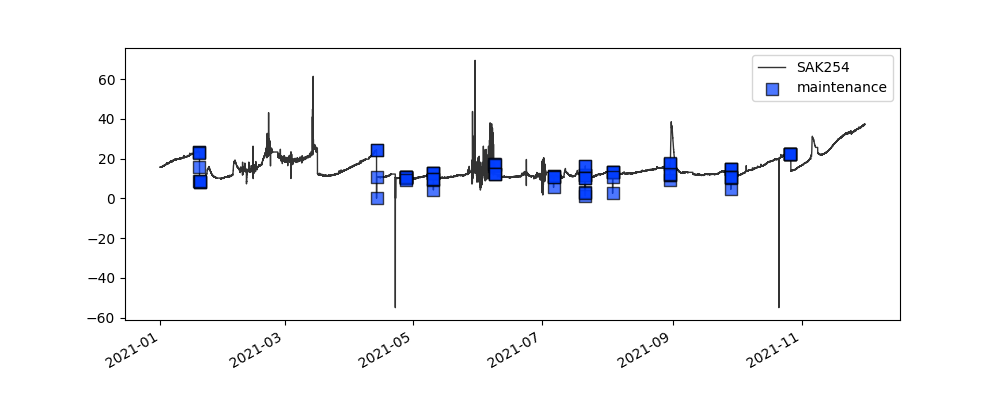

In [19]:
qc.plot(field='SAK254')

## 1.6 Applying a basic range test

* The simple cutoff test [`flagRange`](https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC.flagRange) sets flags where the data exceeds certain upper and/or lower bounds.
* These bounds are variable and controlled by the function's parameter `min` and `max`.

In [20]:
qc = qc.flagRange(field='SAK254', min=0, max=200)

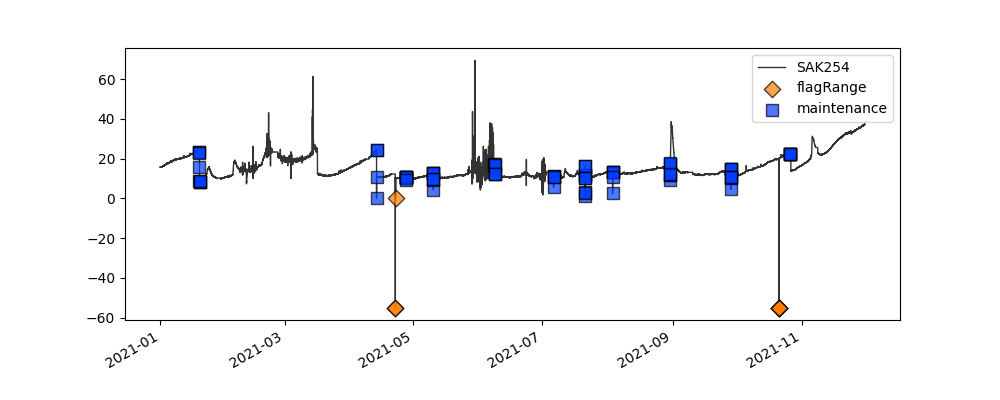

In [21]:
qc.plot(field='SAK254')

## 1.7 Applying constants test

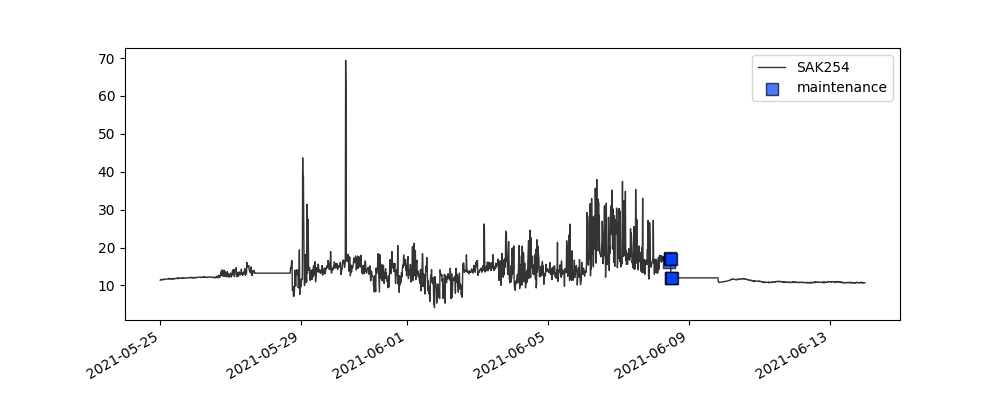

In [22]:
qc.plot(field='SAK254', xscope=slice('2021-05-25', '2021-06-13'))

* A natural measurement may not be very trustworthy if it remains constant (or near constant) for longer periods.
* For the variable at hand, already 2 consecutive meassurements with the exact same value are extremely unlikely.
* So we check the dataset for those events, with the [`flagConstants`](https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC.flagConstants) method.
* More explicitly: we check for data chunks of length *2* hours or more (`window='2h'`), where the data has not changed by more than *.001* in value (`thresh=.001`).

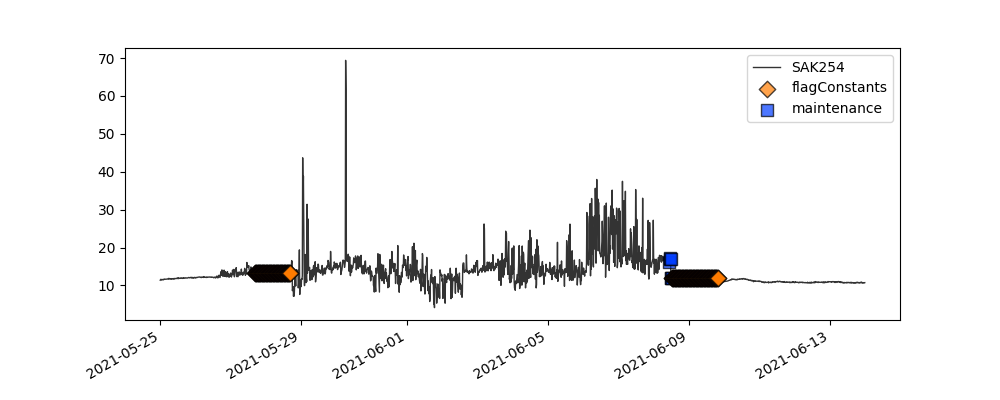

In [23]:
qc = qc.flagConstants(field='SAK254', thresh=.001, window='2h')
qc.plot(field='SAK254', xscope=slice('2021-05-25', '2021-06-13'))

The battery voltage explains some, but very few of the anomalies here


## 1.8 Projecting data to uniform frequency grids

- Most (statistical) data analysis requires the data to be sampled at a uniform sampling rate.
- Checking out the `'SAK254'` data (index) seems to show its uniformly sampled at a *15* minutes rate:

In [24]:
qc.data['SAK254'].head(10)

timestamp
2021-01-01 00:02:00    15.6118
2021-01-01 00:17:00    15.5485
2021-01-01 00:32:00    15.6805
2021-01-01 00:47:00    15.6337
2021-01-01 01:02:00    15.6145
2021-01-01 01:17:00    15.6874
2021-01-01 01:32:00    15.6283
2021-01-01 01:47:00    15.6805
2021-01-01 02:02:00    15.7437
2021-01-01 02:17:00    15.6750
dtype: float64

A closer look reveals however that there are additional values present, that distort the uniformity:

In [25]:
qc.data['SAK254']['2021-05-10 12:00:00':'2021-05-10 14:00:00']

timestamp
2021-05-10 12:02:00    4.19100
2021-05-10 12:17:00    9.38987
2021-05-10 12:32:00    9.58374
2021-05-10 12:46:31    9.64287
2021-05-10 13:02:00    9.49712
2021-05-10 13:17:00    9.70063
2021-05-10 13:32:00    9.72125
2021-05-10 13:47:00    9.77212
dtype: float64

* Independently from the severenes of the sampling rate distortion, it is always good to ensure uniformly sampled data. 
* The results obtained on aligned data, can later be projected back on to the original data. 
* Uniformity of sampling rate can be achieved with the [`align`](https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC.align) method (the data gets aligned to a uniform frequency grid).

* The [`align`](https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC.align) method generates a new timeseries and optionally stores it under the variabe name passed to the `target` parameter (`target='SAK254'`).
* We need to provide the sampling frequency, we want the data to be aligned with (`freq='15min'`).
* We need to provide a method of alignment. This can be a simple shift, an interpolation or an aggregation. We use a simple shift, wich assigns any *15 minutes* multiple the nearest available data point, without manipulating its value. (`method='nshift'`)

In [26]:
qc = qc.align(field='SAK254', target='SAK254-regular', freq='15min', method='nshift')
# lets check out the result first 20 entries
qc.data['SAK254-regular']['2021-06-10']

2021-06-10 00:00:00        NaN
2021-06-10 00:15:00        NaN
2021-06-10 00:30:00        NaN
2021-06-10 00:45:00        NaN
2021-06-10 01:00:00        NaN
                        ...   
2021-06-10 22:45:00    11.0990
2021-06-10 23:00:00    11.1141
2021-06-10 23:15:00    11.0935
2021-06-10 23:30:00    11.0605
2021-06-10 23:45:00    11.2104
Freq: 15min, Length: 96, dtype: float64

Values that are already flagged, do not get included in the alignment, so the result does not show any of the already calculated flags:

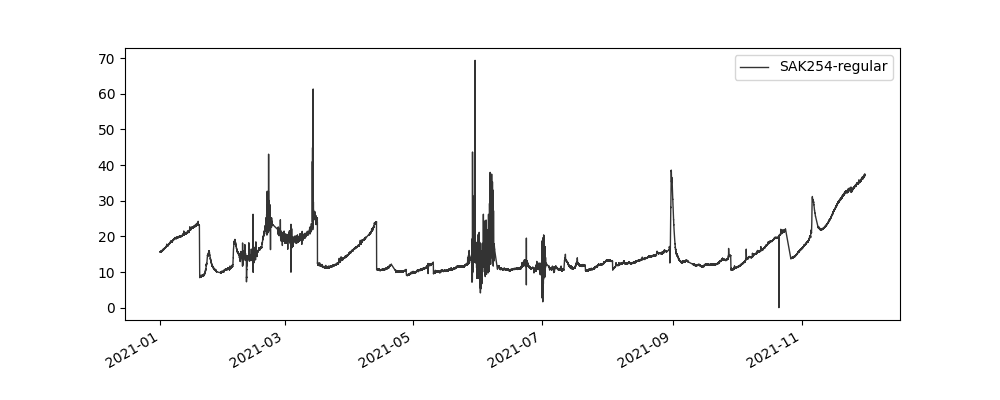

In [27]:
qc.plot(field='SAK254-regular')

## 1.9 Remove "noisy" data

* We now want to flag data chunks, where measurements show erratic jumping behavior.
* Thise is often referred to as noise, although those chunks often don't exhibit a specific distribution.
* What is usually  referred to, is a significantly higher (but not static) scattering amplitude, than the data usually exhibits.

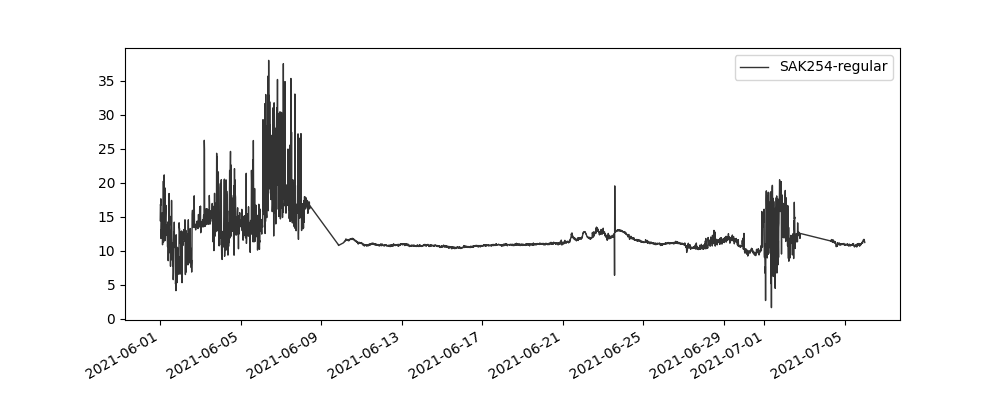

In [28]:
qc.plot(field='SAK254-regular', xscope=slice('2021-06', '2021-07-05'))

* We use the [`flagByScatterLowpass`](https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC.flagByScatterLowpass) function to catch those noise-like phenomena.
* We check for *8h* wide chunks of data (`window='8h'`), where the standard deviation exceeds the value of *0.5* (`thresh=0.5`).
* Those data chunks get flagged, if the standard deviation also exceeds `thresh` in all possible sub windows of size *2h* (`sub_window='2h'`). This prevents overflagging in the vicinity of outliers or locally confined anomlies.

In [29]:
qc = qc.flagByScatterLowpass(field='SAK254-regular', window="8h", sub_window="2h", thresh=0.5, label='noise')

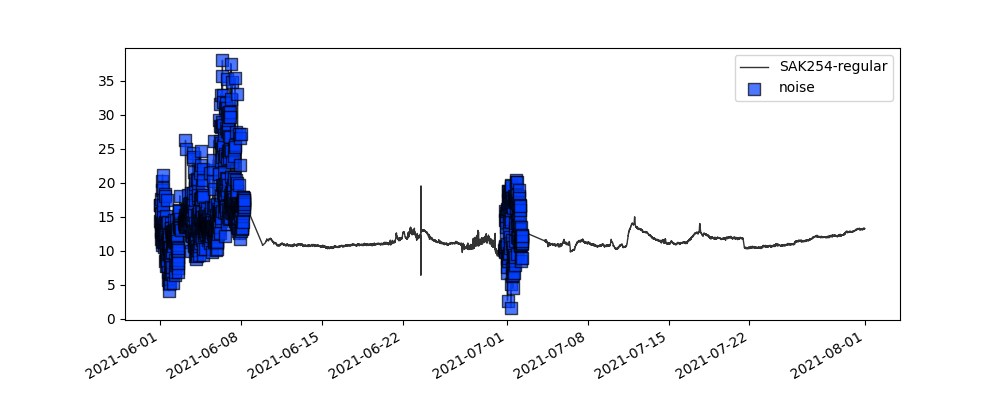

In [30]:
qc.plot(field='SAK254-regular', xscope=slice('2021-06', '2021-07'))

## 1.10 Detection of local outliers

* Detection of local outliers (outliers that do not just exceed global range constraints) is a complex task that usually requires having an error model of the data or some kind of stationary data derivate on which outlier detection can be performed under easing distributional assumptions. 
* Finding or approximating those stationary data derivatives can require some statistical knowledge and analysis, that is often is not easy to automate or might take specific parameter tuning.
* `SaQC` provides outlier detection methods that aim to minimize parameter tuning demands and work in a variety of situations.
* [`flagZScore`](https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC.flagZScore) performs classical `ZScoring` on local chunks of the data.
* [`flagUniLOF`](https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC.flagUniLOF) performs an univariate variant of the local outlier factor approach.
* The SaQC documentation provides a brief [`guide`](https://rdm-software.pages.ufz.de/saqc/cookbooks/OutlierDetection.html) into tuning the [`flagUniLOF`](https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC.flagUniLOF) function.

In [31]:
qc = qc.flagUniLOF(field='SAK254-regular', thresh=1.5, label='outlier')

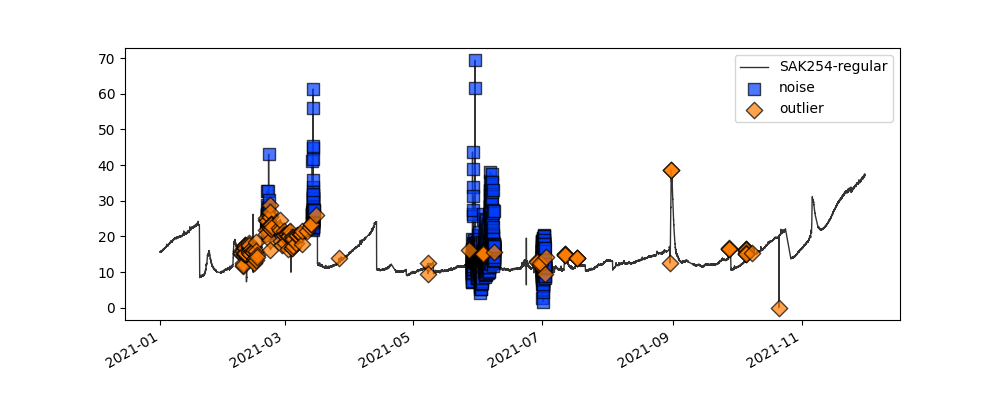

In [32]:
qc.plot(field='SAK254-regular')# , xscope=slice('2021-05','2021-08'), mode='subplots')

## 1.11 Projection of flags between differently sampled variables

* Finally, the flagging result obtained from the regularly sampled (shifted) version of the data should be projected onto the original data in a plausible way.
* This can be achieved with the [`concatFlags`](https://rdm-software.pages.ufz.de/saqc/_api/saqc.core.SaQC.html#saqc.core.SaQC.concatFlags) function. It tries to invert the projection used for generating the regularly sampled data.

In [33]:
qc = qc.concatFlags(field='SAK254-regular', target='SAK254')

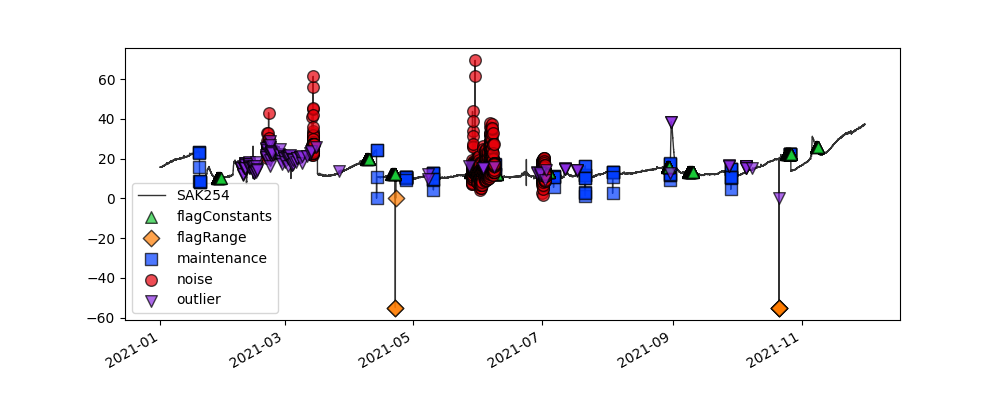

In [34]:
qc.plot(field='SAK254')

## 1.12 Flagging groups of points, surrounded by invalid data

* Groups of observations, that are only surrounded by flagged, invalid or missing data are frequently considered to be not trustworthy. 
* To detect those, `SaQC` provides the [`flagIsolated`](https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC.flagIsolated) method.
* It especially useful to execute this method as a last step in a quality control setup, as certain methods like `flagByScatterLowpass` tend to leave isolated values behind.
* We flag groups of data, fitting in a window of size one hour or smaller (`group_window='1h'`) if those are surrounded by windows of size 4 hours or wider that only containing flagged or no data (`gap_window='4h'`)

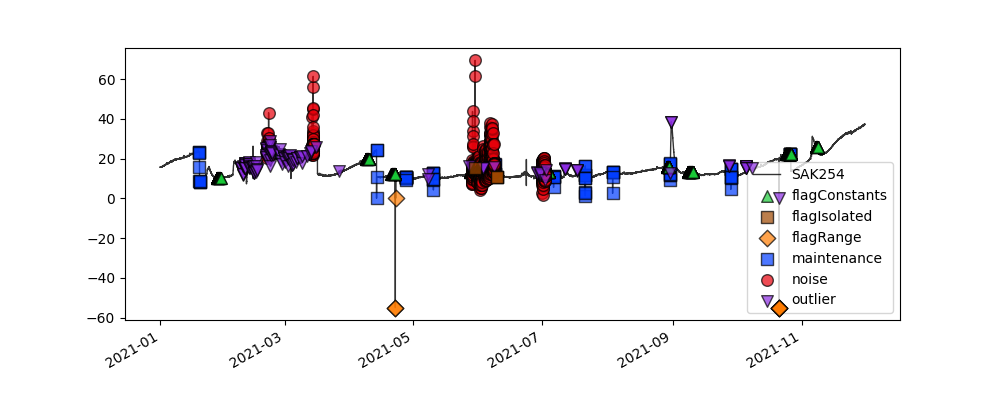

In [35]:
qc = qc.flagIsolated(field='SAK254', group_window='1h', gap_window='4h')
qc.plot(field='SAK254')

## 1.13 Bringing it all together

In [36]:
# import modules
import pandas as pd
import saqc

# read data
data = pd.read_csv('data/SAK254.csv', index_col=0, parse_dates=[0])
maintenance = pd.read_csv('data/SAK254maintenance.csv', index_col=0, parse_dates=[0])

# qc
qc = saqc.SaQC([data, maintenance])

qc = qc.setFlags(field='SAK254', data='maintenance', label='maintenance')
qc = qc.flagRange(field='SAK254', min=0, max=200)
qc = qc.flagConstants(field='SAK254', thresh=.001, window='2h')
qc = qc.align(field='SAK254', target='SAK254-regular', freq='15min', method='nshift')
qc = qc.flagByScatterLowpass(field='SAK254-regular', window='8h', sub_window='2h', thresh=0.5, label='noise')
qc = qc.flagUniLOF(field='SAK254-regular', thresh=2.5, n=20, label='outlier')
qc = qc.concatFlags(field='SAK254-regular', target='SAK254')
qc = qc.flagIsolated(field='SAK254', group_window='1h', gap_window='4h')

# 2. Advanced Features
## 2.1 Generic Conditions
* The method [`flagGeneric`](https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC.flagGeneric) provides a way to include knowledge about the dataset that can be derived from the dataset itself and the interdependence of its variables.
* For example, we want to flag the given soil heat flux data (`SHF04`), whenever the heating element (`SHFheat`) is sending an impulse.

In [37]:
data = pd.read_csv('data/SoilHeatFlux.csv', index_col=0, parse_dates=[0])
data.head()

SHF04    SHF05  SHFheat
Date Time                                    
2022-01-01 00:00:00  5.2819   7.3495        0
2022-01-01 00:10:00  5.2819  16.3804       -3
2022-01-01 00:20:00  5.2819  16.4925        0
2022-01-01 00:30:00  5.2819  10.2518        0
2022-01-01 00:40:00  5.2819   8.5702        0

In [38]:
qc = saqc.SaQC(data)

We include this condition by formluating it as a function: 

In [39]:
condition = lambda x: x < 0

Next, we use the [`flagGeneric`](https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC.flagGeneric) method, to apply the condition onto variables, and flag the *target* variable, wherever the condition is *True*. The function needs to accept the same number of arguments as variables given
in ``field`` and should return the same number of elements as given in ``target``

In [40]:
qc = qc.flagGeneric(field='SHFheat', target='SHF04', func=lambda x: x < 0)

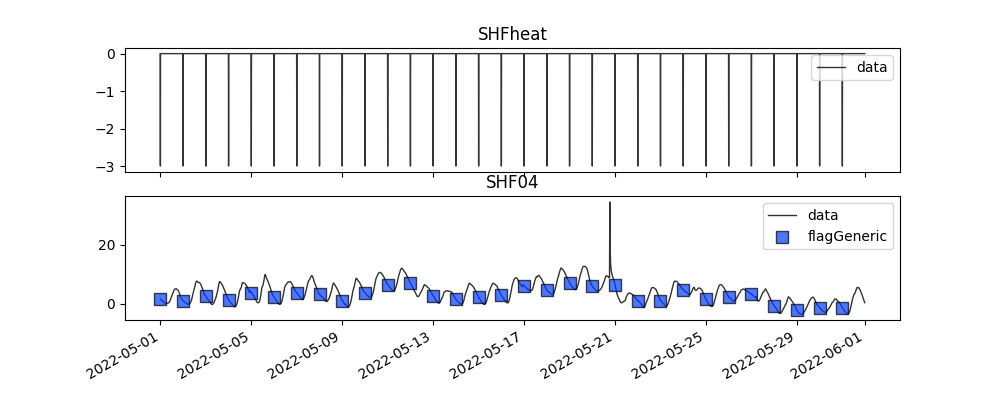

In [41]:
# we briefly check out the results:
qc.plot(field=['SHFheat', 'SHF04'], mode='subplots', xscope='2022-05')

## 2.2 Generic Processing
- `SaQC` supports calculations based on the variables available in a dataset.
- To compute the arithmetic mean of the variables `SHF04` and `SHF04` we need to formulate a respective calculation function.

In [42]:
func = lambda x, y: (x + y) / 2

In [43]:
qc = qc.processGeneric(field=['SHF04', 'SHF05'], target='SHFmean', func=func)

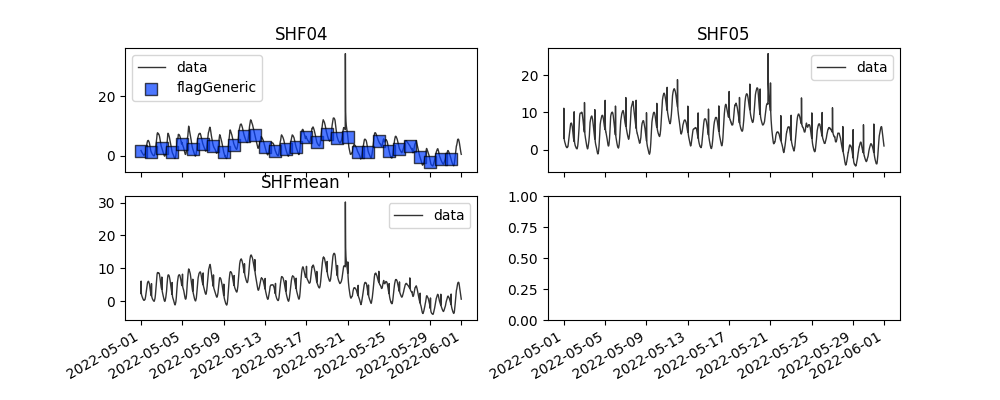

In [44]:
qc.plot(field=['SHF04', 'SHF05', 'SHFmean'], mode='subplots', xscope='2022-05')

## 2.3 Combining Tests
- `SaQC` provides a flexible mechanism to combine the built-in test using group operations.
- There are two different group operations available, differentiated by the way resulting flags are combined:
   * `andGroup`: values are flagged, if **all** involved tests set a flag.
   * `orGroup`: values are flagged, if **any** of the involved tests sets a flag.
- Let's say we want to enhance the function `flagConstants` in a way, that it won't flag values as constants, if they are below a given threshold.

In [45]:
data = pd.read_csv('data/ShortWaveRadiation.csv', index_col=0, parse_dates=[0])
qc = saqc.SaQC(data)

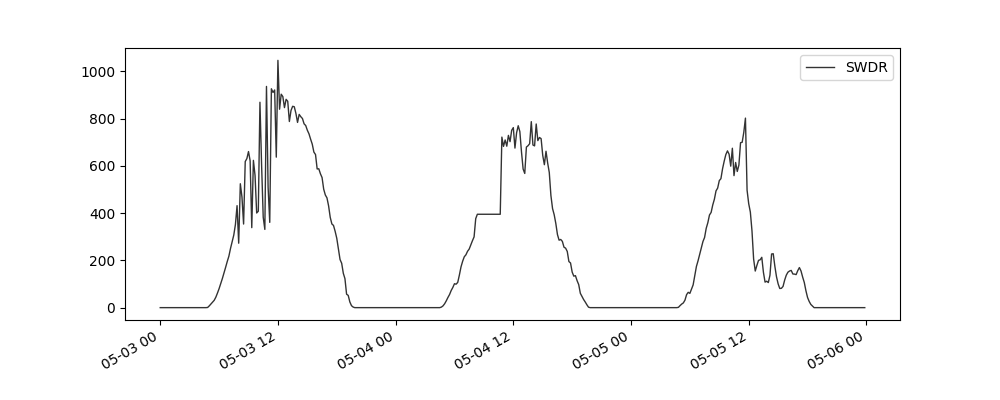

In [46]:
qc.plot(field='SWDR', xscope=slice('2023-05-03', '2023-05-05'))

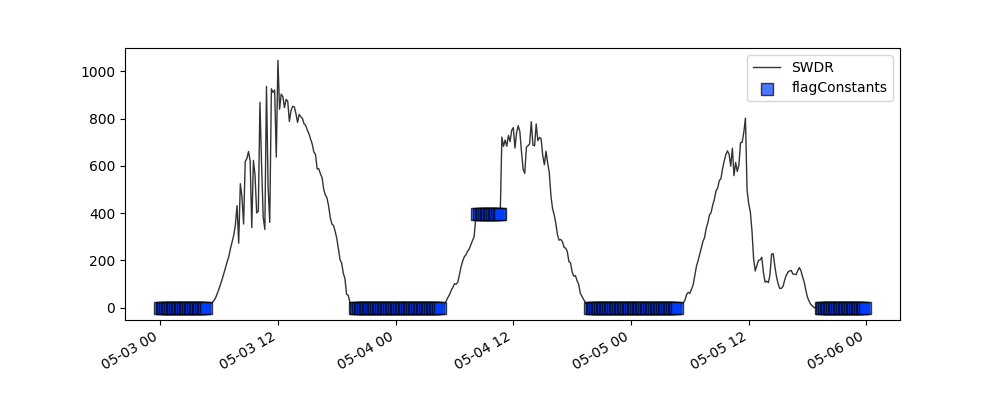

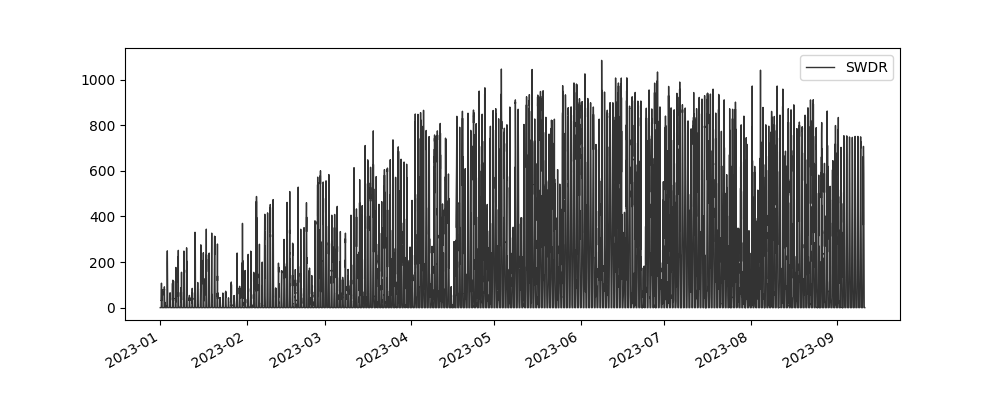

In [47]:
qc.flagConstants(field='SWDR', thresh=0, window='2h').plot('SWDR', xscope=slice('2023-05-03', '2023-05-05'))
qc.plot(field="SWDR")

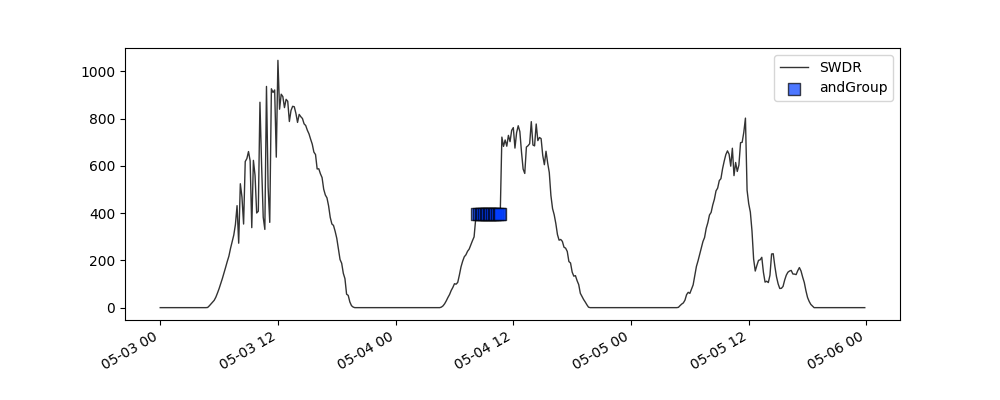

In [48]:
qc = qc.andGroup(
    field='SWDR',
    group=[
        qc.flagGeneric(field='SWDR', func=lambda x: x > 0),
        qc.flagConstants(field='SWDR', thresh=0, window='2h') 
    ]
)
qc.plot(field='SWDR', xscope=slice('2023-05-03', '2023-05-05'))

# 3. Flags / Quality Labels

In [49]:
qc = saqc.SaQC(data)
qcf = qc.flagConstants(field='SWDR', thresh=0, window='2h')
qcf.flags['SWDR'].loc['2023-05-04 04']

Date Time
2023-05-04 04:00:00    255.0
2023-05-04 04:10:00    255.0
2023-05-04 04:20:00    255.0
2023-05-04 04:30:00    255.0
2023-05-04 04:40:00     -inf
2023-05-04 04:50:00     -inf
dtype: float64

- The first elements evaluate to `255.0`
- The last elements evaluate to `-inf`

## 3.1 Special Flags
In SaQC flags are internally represented by floating point values. Any value within the precision of 64 bit could represent quality information, however some values carry special semantics:
  * `255`: Marks values as 'bad', i.e. those values failed to pass at least one test.
  * `-inf`: Represents the status unflagged. Values marked as `-inf` where either never checked at all or did pass all tests so far.

For a more convient usage of these special flags SaQC provides the following alliases:
  * `255`: `BAD`
  * `-inf`: `UNFLAGGED`

To use these aliases import them from the main saqc package:

In [50]:
from saqc import BAD, UNFLAGGED

## 3.2 Setting specific flags
- If no specific flag is given, test functions use the flag `255` to mark something as invalid. 
- All functions support the parameter `flag` to set a custom flag value, in the default flagging scheme values between `0` and `255` are available.

In [51]:
qc = saqc.SaQC(data)
qc = qc.flagConstants(field='SWDR', thresh=0, window='2h', flag=25)
qc.flags['SWDR'].loc['2023-05-04 04:20':'2023-05-04 05:30']

Date Time
2023-05-04 04:20:00    25.0
2023-05-04 04:30:00    25.0
2023-05-04 04:40:00    -inf
2023-05-04 04:50:00    -inf
2023-05-04 05:00:00    -inf
2023-05-04 05:10:00    -inf
2023-05-04 05:20:00    -inf
2023-05-04 05:30:00    -inf
dtype: float64

## 3.3 Flagging Schemes
- Flagging Scheme: Describes a number of flags and their interrelation.
- SaQC provides several built in flagging schemes:
  * `"float"`: The default scheme supports flags between 0 and 255, plus the unflagged marker -inf.
  * `AnnotatedFloatScheme`: Annotates the default `"float"` scheme with provenance information.
  * `"simple"`: Supports the string flags `"UNFLAGGED"`, `"BAD"`, `"OK"`.
  * `"dmp"`: Implements the flagging scheme of the UFZ Datamanagement Portal.
- It is possible to implement and integrate custom flagging schemes.
- All flagging schemes support at least the two special flags `UNFLAGGED` and `BAD`.

In [52]:
qc = saqc.SaQC(data, scheme="simple")
qc = qc.flagConstants(field='SWDR', thresh=0, window="2h")
qc.flags['SWDR'].loc['2023-05-04 04:20':'2023-05-04 05:30']

Date Time
2023-05-04 04:20:00          BAD
2023-05-04 04:30:00          BAD
2023-05-04 04:40:00    UNFLAGGED
2023-05-04 04:50:00    UNFLAGGED
2023-05-04 05:00:00    UNFLAGGED
2023-05-04 05:10:00    UNFLAGGED
2023-05-04 05:20:00    UNFLAGGED
2023-05-04 05:30:00    UNFLAGGED
dtype: object

In [53]:
qc.scheme = "dmp"
qc.flags['SWDR'].loc['2023-05-04 04:20':'2023-05-04 05:30']

quality_flag quality_cause  \
Date Time                                        
2023-05-04 04:20:00          BAD         OTHER   
2023-05-04 04:30:00          BAD         OTHER   
2023-05-04 04:40:00          NIL                 
2023-05-04 04:50:00          NIL                 
2023-05-04 05:00:00          NIL                 
2023-05-04 05:10:00          NIL                 
2023-05-04 05:20:00          NIL                 
2023-05-04 05:30:00          NIL                 

                                              quality_comment  
Date Time                                                      
2023-05-04 04:20:00  {"test": "flagConstants", "comment": ""}  
2023-05-04 04:30:00  {"test": "flagConstants", "comment": ""}  
2023-05-04 04:40:00                                            
2023-05-04 04:50:00                                            
2023-05-04 05:00:00                                            
2023-05-04 05:10:00                                            
2023-05-04 05:20:00                                            
2023-05-04 05:30:00

In [54]:
from saqc.core.translation import AnnotatedFloatScheme
qc.scheme = AnnotatedFloatScheme()
qc = qc.flagRange(field='SWDR', min=0, max=40, flag=25)
qc.flags['SWDR'].loc['2023-05-04 04:20':'2023-05-04 05:30']

flag           func  \
Date Time                                   
2023-05-04 04:20:00  255.0  flagConstants   
2023-05-04 04:30:00  255.0  flagConstants   
2023-05-04 04:40:00   -inf                  
2023-05-04 04:50:00   -inf                  
2023-05-04 05:00:00   -inf                  
2023-05-04 05:10:00   -inf                  
2023-05-04 05:20:00   25.0      flagRange   
2023-05-04 05:30:00   25.0      flagRange   

                                                            parameters  
Date Time                                                               
2023-05-04 04:20:00  {'thresh': 0, 'window': '2h', 'dfilter': -inf,...  
2023-05-04 04:30:00  {'thresh': 0, 'window': '2h', 'dfilter': -inf,...  
2023-05-04 04:40:00                                                     
2023-05-04 04:50:00                                                     
2023-05-04 05:00:00                                                     
2023-05-04 05:10:00                                                     
2023-05-04 05:20:00  {'min': 0, 'max': 40, 'dfilter': -inf, 'flag':...  
2023-05-04 05:30:00  {'min': 0, 'max': 40, 'dfilter': -inf, 'flag':...

## 3.4 Flag Histories
- For reasons of traceability and reproducability `SaQC` implements the idea of an `History`.
- For every variable all executed functions, including their parameters and the resulting flags are recorded.
- This information might (or might not) be used by flagging schemes and metadata enrichment.

In [55]:
qc._history['SWDR'].hist.loc['2023-05-04 04:20':'2023-05-04 05:30']

0     1
Date Time                       
2023-05-04 04:20:00  255.0   NaN
2023-05-04 04:30:00  255.0   NaN
2023-05-04 04:40:00    NaN   NaN
2023-05-04 04:50:00    NaN   NaN
2023-05-04 05:00:00    NaN   NaN
2023-05-04 05:10:00    NaN   NaN
2023-05-04 05:20:00    NaN  25.0
2023-05-04 05:30:00    NaN  25.0

In [56]:
qc._history['SWDR'].meta

[{'func': 'flagConstants',
  'args': (),
  'kwargs': {'thresh': 0, 'window': '2h', 'dfilter': -inf, 'field': 'SWDR'}},
 {'func': 'flagRange',
  'args': (),
  'kwargs': {'min': 0,
   'max': 40,
   'dfilter': -inf,
   'flag': 25.0,
   'field': 'SWDR'}}]

## 3.5 Filtering of flagged values
- Per default, `SaQC` flags values exactly once. If an observation was already flagged it won't be passed to the subsequent tests (i.e. it's concrete value is temporarily replaced by `NaN`).
- This allows the setup of quality control pipelines, where each subsequent test operates on pre-checked time series.
- Which observations are filtered depends on:
  * The flagging scheme, usually all values that are flagged with a flag > `UNFLAGGED` .
  * The value of the globally available parameter `dfilter`, which determines a flag threshold, above which, values will be masked (i.e. with `dfilter=255` only values with a flag lower than `255` will be passed to a test).

In [57]:
qc.flags['SWDR'].loc['2023-05-04 04:20':'2023-05-04 05:30']

flag           func  \
Date Time                                   
2023-05-04 04:20:00  255.0  flagConstants   
2023-05-04 04:30:00  255.0  flagConstants   
2023-05-04 04:40:00   -inf                  
2023-05-04 04:50:00   -inf                  
2023-05-04 05:00:00   -inf                  
2023-05-04 05:10:00   -inf                  
2023-05-04 05:20:00   25.0      flagRange   
2023-05-04 05:30:00   25.0      flagRange   

                                                            parameters  
Date Time                                                               
2023-05-04 04:20:00  {'thresh': 0, 'window': '2h', 'dfilter': -inf,...  
2023-05-04 04:30:00  {'thresh': 0, 'window': '2h', 'dfilter': -inf,...  
2023-05-04 04:40:00                                                     
2023-05-04 04:50:00                                                     
2023-05-04 05:00:00                                                     
2023-05-04 05:10:00                                                     
2023-05-04 05:20:00  {'min': 0, 'max': 40, 'dfilter': -inf, 'flag':...  
2023-05-04 05:30:00  {'min': 0, 'max': 40, 'dfilter': -inf, 'flag':...

In [58]:
qc.data["SWDR"].loc['2023-05-04 04:20':'2023-05-04 05:30']

Date Time
2023-05-04 04:20:00     0.0000
2023-05-04 04:30:00     0.0000
2023-05-04 04:40:00     2.2731
2023-05-04 04:50:00     7.4869
2023-05-04 05:00:00    16.5791
2023-05-04 05:10:00    28.9272
2023-05-04 05:20:00    43.0233
2023-05-04 05:30:00    55.5289
dtype: float64

In [59]:
qc1 = qc.flagGeneric('SWDR', func=lambda x: x > 40)
qc1.flags["SWDR"].loc['2023-05-04 04:20':'2023-05-04 05:30']

flag           func  \
Date Time                                   
2023-05-04 04:20:00  255.0  flagConstants   
2023-05-04 04:30:00  255.0  flagConstants   
2023-05-04 04:40:00   -inf                  
2023-05-04 04:50:00   -inf                  
2023-05-04 05:00:00   -inf                  
2023-05-04 05:10:00   -inf                  
2023-05-04 05:20:00   25.0      flagRange   
2023-05-04 05:30:00   25.0      flagRange   

                                                            parameters  
Date Time                                                               
2023-05-04 04:20:00  {'thresh': 0, 'window': '2h', 'dfilter': -inf,...  
2023-05-04 04:30:00  {'thresh': 0, 'window': '2h', 'dfilter': -inf,...  
2023-05-04 04:40:00                                                     
2023-05-04 04:50:00                                                     
2023-05-04 05:00:00                                                     
2023-05-04 05:10:00                                                     
2023-05-04 05:20:00  {'min': 0, 'max': 40, 'dfilter': -inf, 'flag':...  
2023-05-04 05:30:00  {'min': 0, 'max': 40, 'dfilter': -inf, 'flag':...

In [60]:
qc2 = qc.flagGeneric('SWDR', func=lambda x: x > 40, dfilter=255)
qc2.flags["SWDR"].loc['2023-05-04 04:20':'2023-05-04 05:30']

flag           func  \
Date Time                                   
2023-05-04 04:20:00  255.0  flagConstants   
2023-05-04 04:30:00  255.0  flagConstants   
2023-05-04 04:40:00   -inf                  
2023-05-04 04:50:00   -inf                  
2023-05-04 05:00:00   -inf                  
2023-05-04 05:10:00   -inf                  
2023-05-04 05:20:00  255.0    flagGeneric   
2023-05-04 05:30:00  255.0    flagGeneric   

                                                            parameters  
Date Time                                                               
2023-05-04 04:20:00  {'thresh': 0, 'window': '2h', 'dfilter': -inf,...  
2023-05-04 04:30:00  {'thresh': 0, 'window': '2h', 'dfilter': -inf,...  
2023-05-04 04:40:00                                                     
2023-05-04 04:50:00                                                     
2023-05-04 05:00:00                                                     
2023-05-04 05:10:00                                                     
2023-05-04 05:20:00  {'func': <function <lambda> at 0x756ef9381580>...  
2023-05-04 05:30:00  {'func': <function <lambda> at 0x756ef9381580>...

In [61]:
qc2._history["SWDR"].hist.loc['2023-05-04 04:20':'2023-05-04 05:30']

0     1      2
Date Time                              
2023-05-04 04:20:00  255.0   NaN    NaN
2023-05-04 04:30:00  255.0   NaN    NaN
2023-05-04 04:40:00    NaN   NaN    NaN
2023-05-04 04:50:00    NaN   NaN    NaN
2023-05-04 05:00:00    NaN   NaN    NaN
2023-05-04 05:10:00    NaN   NaN    NaN
2023-05-04 05:20:00    NaN  25.0  255.0
2023-05-04 05:30:00    NaN  25.0  255.0

# 4. Extending SaQC
## 4.2 Custom flagging schemes
- SaQC ships a set of predefined flagging schemes but also provides a mechanism to implement custom flagging schemes if needed.
- Custom flagging schemes are implemented via inheritance (directly or inderictly) from `saqc.core.translation.basescheme.TranslationScheme` and need to provide:
  * a translation from 'external' (i.e. user) to 'internal' (i.e. saqc) flags
  * a translation from 'internal' (i.e. saqc) to 'external' (i.e. user) flags, including the special flags `BAD` and `UNFLAGGED`
  * a default filtering constant
- For the simpler (but often sufficient) subcase, where this translation can be represented by a dictionary lookup, a custom flagging scheme implementatoion could look like this:

In [62]:
from saqc.constants import UNFLAGGED, BAD
from saqc.core.translation.basescheme import MappingScheme

FORWARD_MAP = {-1: UNFLAGGED, 1: 10, 2: 20, 3: 30, 9: BAD}
BACKWARD_MAP = {UNFLAGGED: -1, 10: 1, 20: 2, 30: 3, BAD: 9}

class MyScheme(MappingScheme):    
    def __init__(self):
        super().__init__(FORWARD_MAP, BACKWARD_MAP)

In [63]:
qc = saqc.SaQC(data, scheme=MyScheme())

In [64]:
qc = qc.flagConstants(field='SWDR', thresh=0, window='2h')
qc = qc.flagRange(field='SWDR', min=0, max=40, flag=3)
qc.flags['SWDR'].loc['2023-05-04 04:20':'2023-05-04 05:30']

Date Time
2023-05-04 04:20:00    9.0
2023-05-04 04:30:00    9.0
2023-05-04 04:40:00   -1.0
2023-05-04 04:50:00   -1.0
2023-05-04 05:00:00   -1.0
2023-05-04 05:10:00   -1.0
2023-05-04 05:20:00    3.0
2023-05-04 05:30:00    3.0
dtype: float64

## 4.2 Custom test functions
- To include custom functionality into `SaQC`, the system provides the decorators `flagging`, `processing` and `register`
- To implement a custom function that flags a specific given value:

In [65]:
from saqc.core import flagging

@flagging()
def flagMyValue(qc: saqc.SaQC, field: str, value: float, flag: float=255.0, **kwargs) -> saqc.SaQC:
    mask = (qc._data[field] == value)
    qc._flags[mask, field] = flag
    return qc

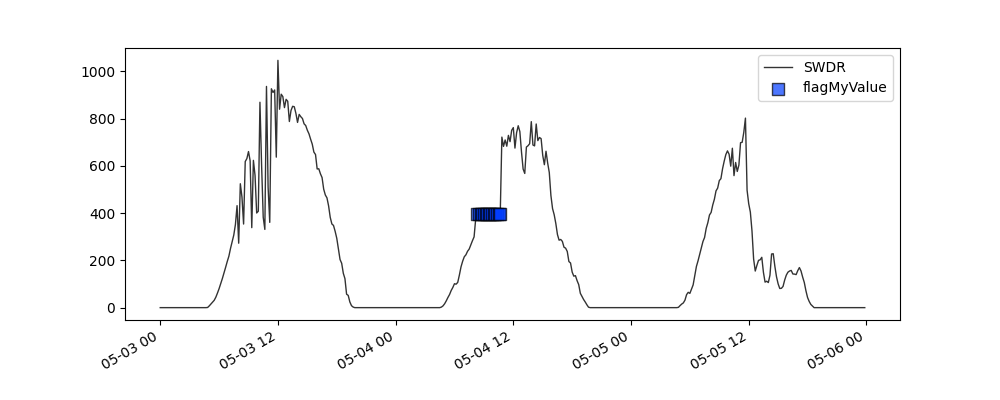

In [66]:
qc = saqc.SaQC(data)
qc = qc.flagMyValue(field='SWDR', value=395)
qc.plot(field='SWDR', xscope=slice('2023-05-03', '2023-05-05'))

# 5. Resources
- Repository: https://git.ufz.de/rdm-software/saqc
- Documentation: https://rdm-software.pages.ufz.de/saqc/index.html
- Configurator: https://webapp.ufz.de/saqc-config-app/
- Support: saqc-support@ufz.de
- Paper: https://doi.org/10.1016/j.envsoft.2023.105809